In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install xgboost

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgb

In [3]:
df = pd.read_csv('fetal_health.csv')
df.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [5]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

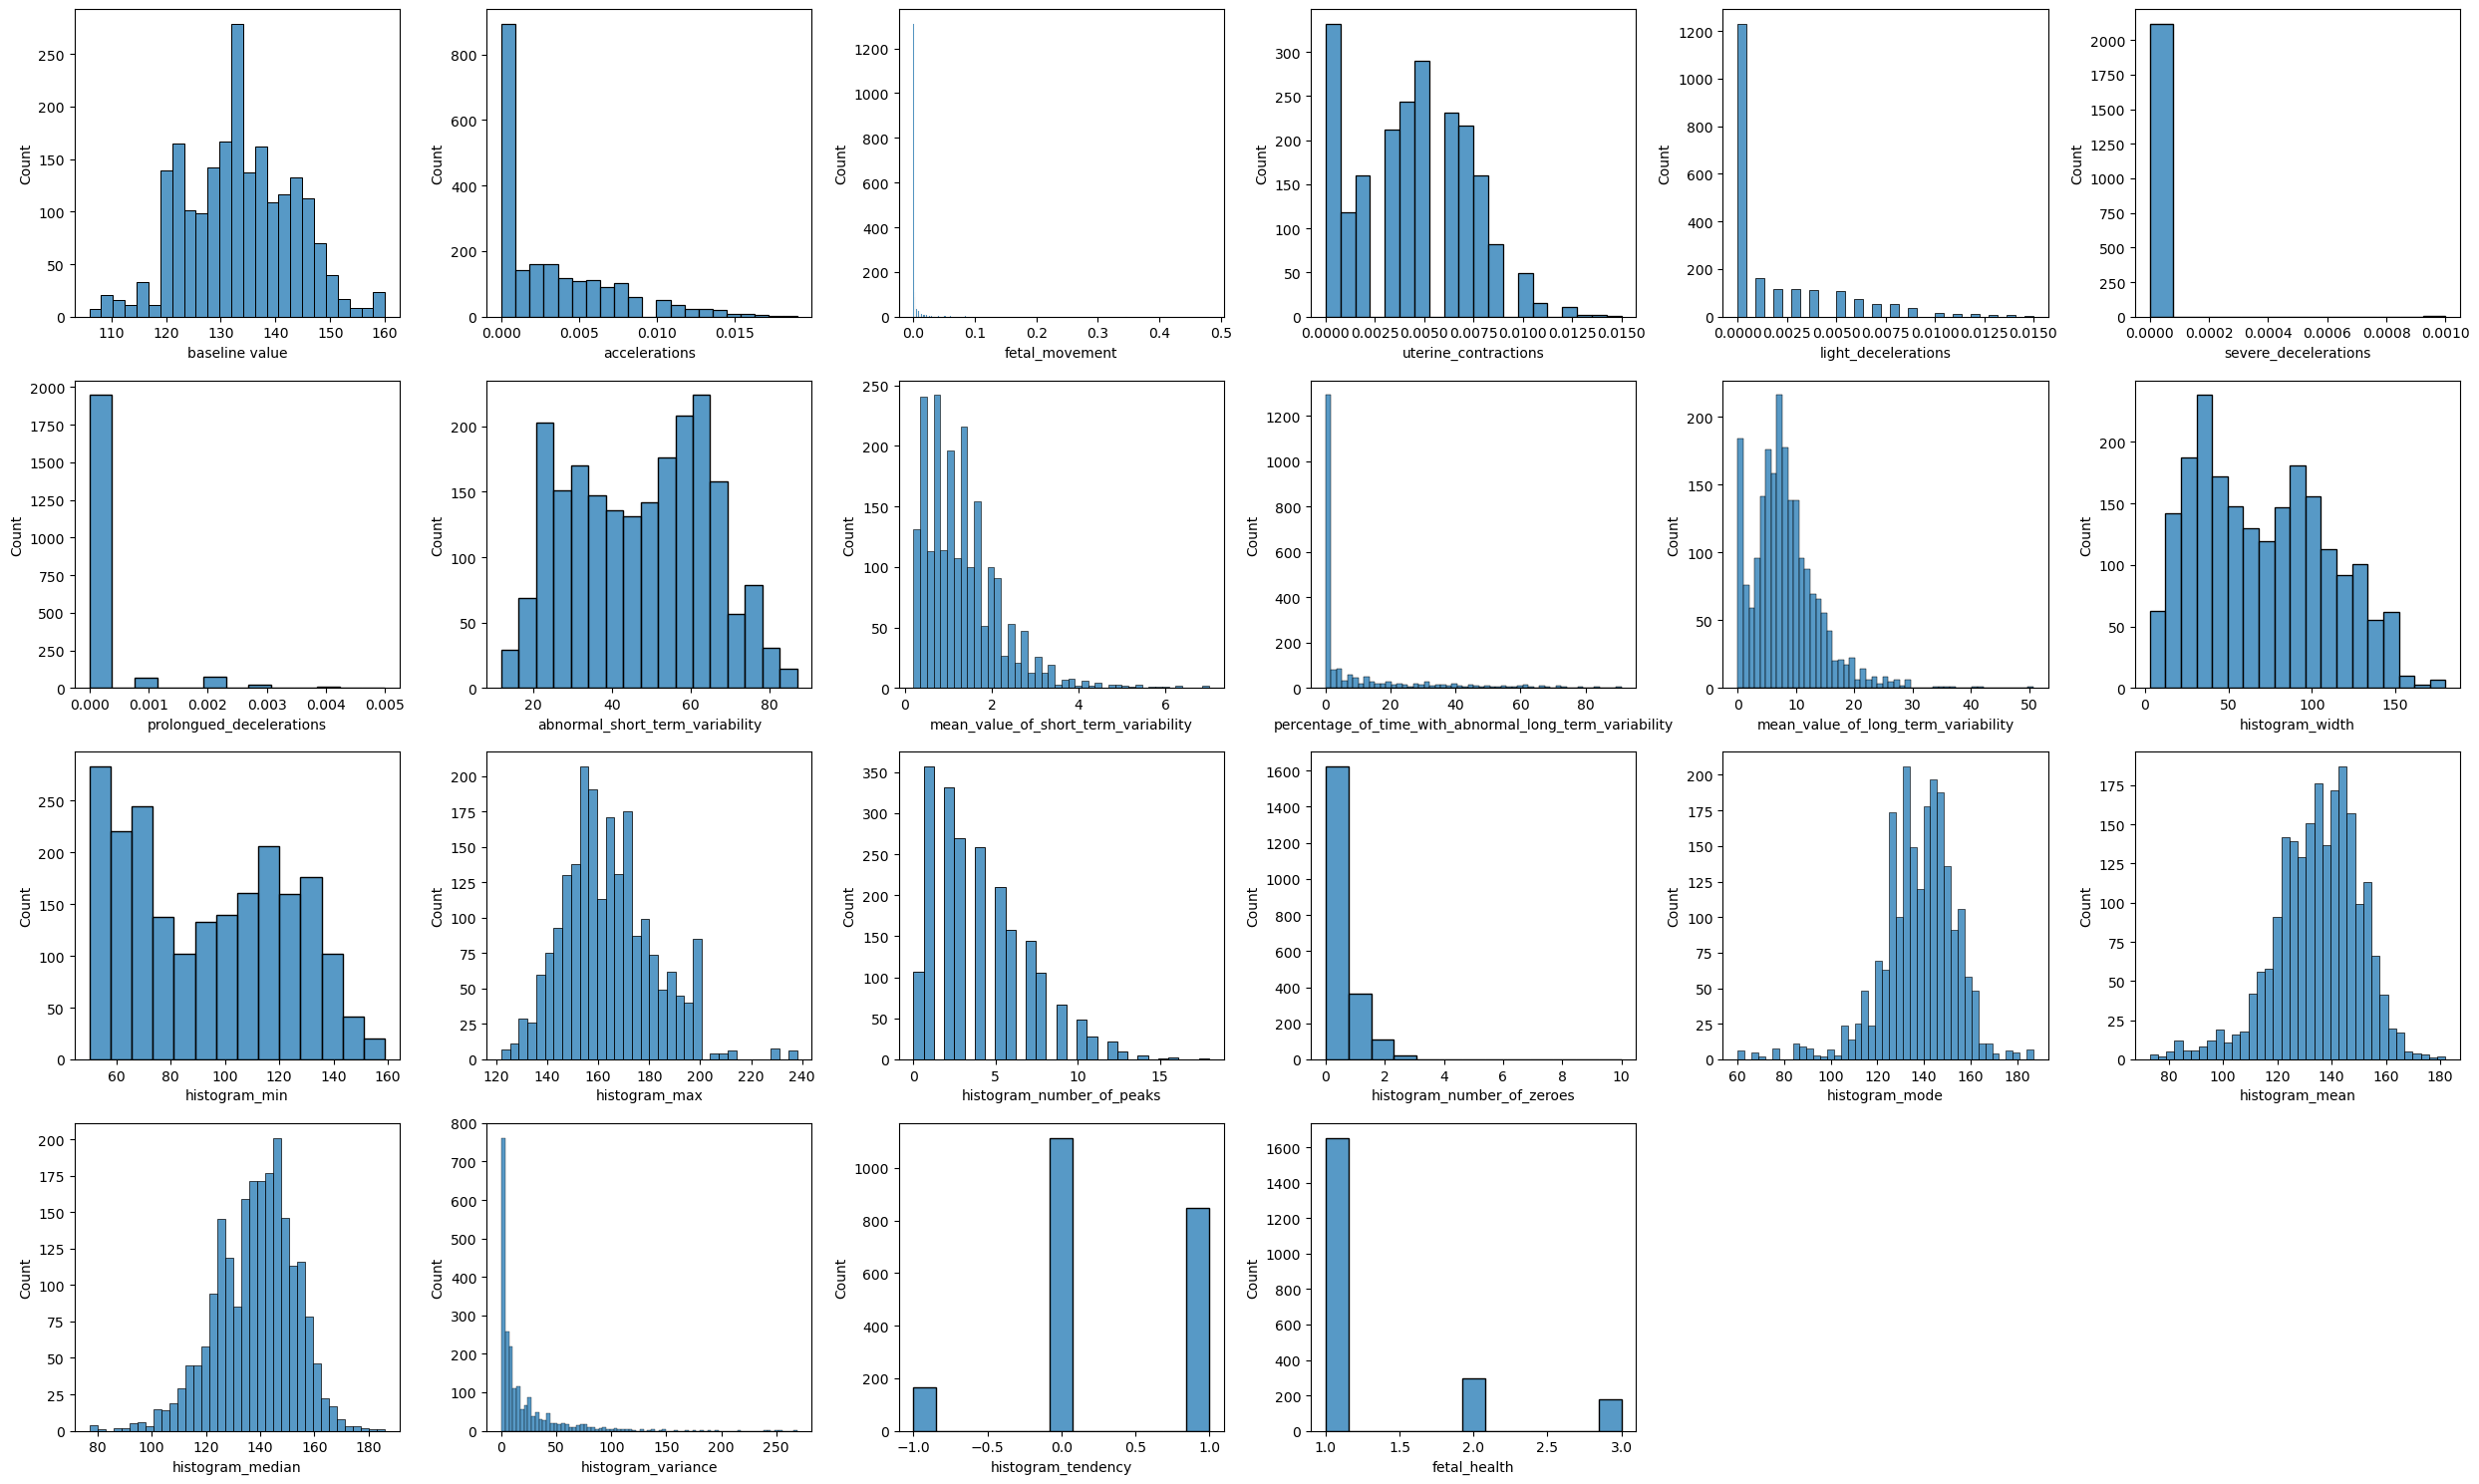

In [7]:
plt.figure(figsize=(25, 15))

for i, column in enumerate(df.columns):
    plt.subplot(4, 6, i + 1)
    sns.histplot(data=df[column])
    
plt.tight_layout()
plt.show()

In [8]:
(df > 0).all(1)

0       False
1       False
2       False
3       False
4       False
        ...  
2121    False
2122    False
2123    False
2124    False
2125    False
Length: 2126, dtype: bool

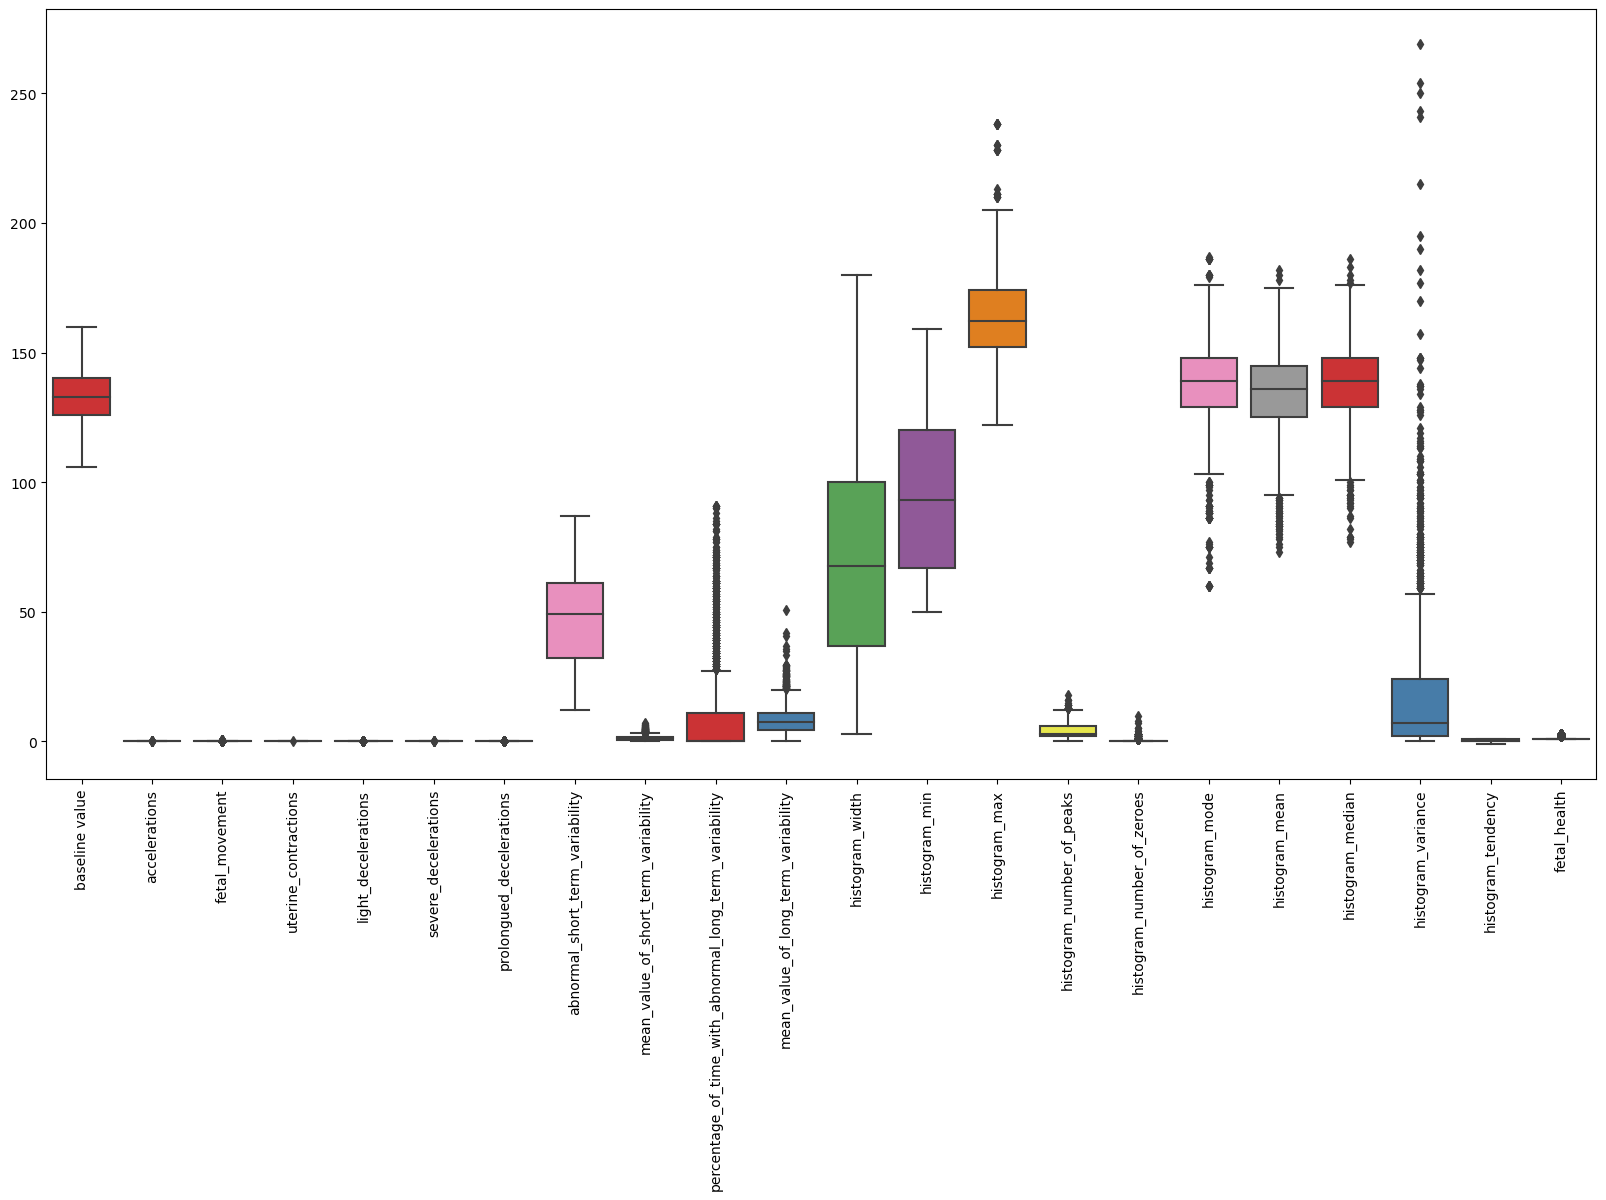

In [9]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

In [10]:
def removeOutlier(att, df):

    lowerbound = att.mean() - 3 * att.std()
    upperbound = att.mean() + 3 * att.std()
    print('lowerbound: ',lowerbound,' -------- upperbound: ', upperbound )

    df1 = df[(att > lowerbound) & (att < upperbound)]

    print((df.shape[0] - df1.shape[0]), ' number of outliers from ', df.shape[0] )
    print(' ******************************************************\n')
    
    df = df1.copy()

    return df

In [11]:
df = removeOutlier(df.histogram_variance, df)
df = removeOutlier(df.histogram_median, df)
df = removeOutlier(df.histogram_mean, df)
df = removeOutlier(df.histogram_mode, df)
df = removeOutlier(df.percentage_of_time_with_abnormal_long_term_variability, df)
df = removeOutlier(df.mean_value_of_short_term_variability, df)

lowerbound:  -68.12481771467543  -------- upperbound:  105.74099833555971
44  number of outliers from  2126
 ******************************************************

lowerbound:  96.21293175778905  -------- upperbound:  180.71886459187473
17  number of outliers from  2082
 ******************************************************

lowerbound:  92.08366378331934  -------- upperbound:  178.71246212467096
17  number of outliers from  2065
 ******************************************************

lowerbound:  97.08081110895039  -------- upperbound:  180.2912592035496
17  number of outliers from  2048
 ******************************************************

lowerbound:  -45.780257839676395  -------- upperbound:  66.39473346744597
57  number of outliers from  2031
 ******************************************************

lowerbound:  -1.1711686306789308  -------- upperbound:  3.781908245673865
30  number of outliers from  1974
 ******************************************************



In [12]:
df.shape

(1944, 22)

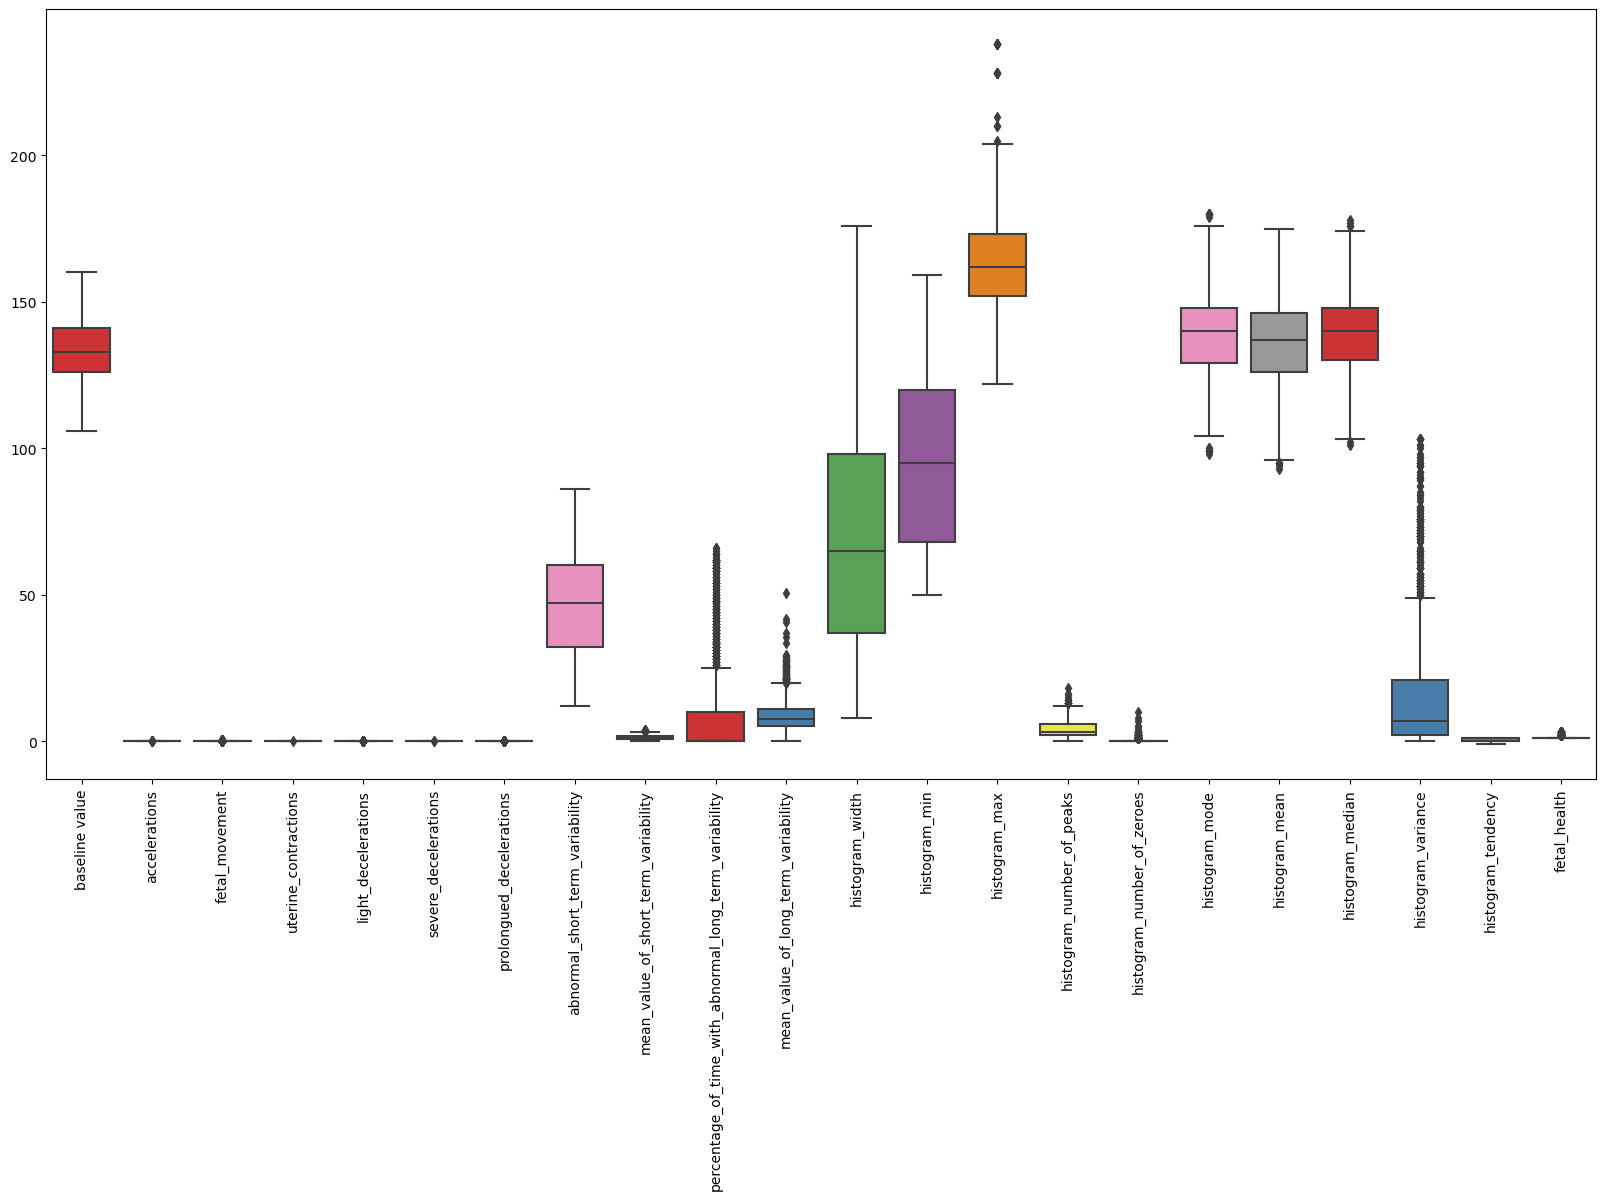

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

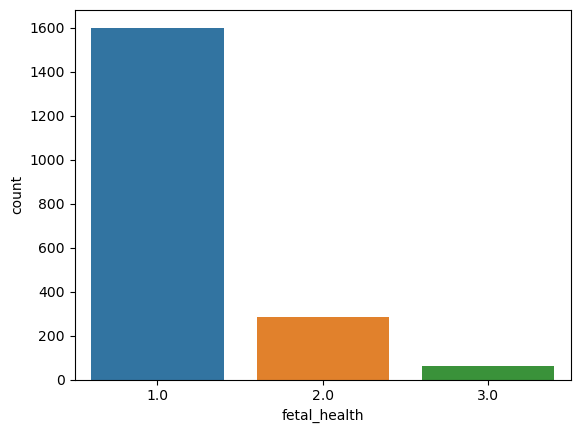

In [14]:
sns.countplot(x="fetal_health",data = df)
plt.show()

In [15]:
df.fetal_health.value_counts()

fetal_health
1.0    1601
2.0     283
3.0      60
Name: count, dtype: int64

In [16]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = df[df.fetal_health==1]
df_2 = df[df.fetal_health==2]
df_3 = df[df.fetal_health==3]
 
# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=1601,    # to match majority class
                                 random_state=123) # reproducible results

df_3_upsampled = resample(df_3, 
                                 replace=True,     # sample with replacement
                                 n_samples=1601,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_2_upsampled, df_3_upsampled])
 
# Display new class counts
df_upsampled.fetal_health.value_counts()

fetal_health
1.0    1601
2.0    1601
3.0    1601
Name: count, dtype: int64

In [17]:
x = df_upsampled.drop('fetal_health', axis = 1)
y = df_upsampled['fetal_health'] 
x.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
12,131.0,0.005,0.072,0.008,0.003,0.0,0.0,28.0,1.4,0.0,...,66.0,88.0,154.0,5.0,0.0,135.0,134.0,137.0,7.0,1.0


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
!pip install mlxtend

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from mlxtend.plotting import plot_confusion_matrix

def evaluator(y_test, y_pred):    
    
    # Accuracy:
    print('Accuracy is: ', accuracy_score(y_test,y_pred))
    print('')
    # Classification Report:
    print('Classification Report: \n',classification_report(y_test,y_pred))

    print('Confusion Matrix: \n\n')
    plt.style.use("ggplot")
    cm = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(conf_mat = cm,figsize=(8,6),show_normed=True)

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])
models = {
          "KNN" : KNeighborsClassifier(),
          "DT" : DecisionTreeClassifier(),
          'RFC' : RandomForestClassifier(),
          'GBC' : GradientBoostingClassifier(),
          'XGB' : XGBClassifier()
          }

for test, clf in models.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    train_pred = clf.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    print("\n", test + ' scores')
    print(acc)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print('*' * 100,"\n")
    model_accuracy = pd.concat([model_accuracy, pd.DataFrame({'Model': [test], 'Accuracy': [acc], 'Train_acc': [train_acc]})], ignore_index=True)
    print(model_accuracy)



 KNN scores
0.04329725228975854
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.11      0.12      0.11       414
         2.0       0.01      0.01      0.01       400
         3.0       0.00      0.00      0.00       387

    accuracy                           0.04      1201
   macro avg       0.03      0.03      0.03      1201
weighted avg       0.04      0.04      0.04      1201

[[  0   0   0   0]
 [364  49   1   0]
 [  6 391   3   0]
 [  0   0 387   0]]
**************************************************************************************************** 

  Model  Accuracy  Train_acc
0   KNN  0.043297   0.973071

 DT scores
0.01665278934221482
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.05      0.05      0.05       414
         2.0       0.00      0.00      0.00       400
         3.0       0.00      0.00      0.00  

In [29]:
model_accuracy.sort_values(ascending=False, by = 'Accuracy')

,Model,Accuracy,Train_acc
0,KNN,0.043297,0.973071
2,RFC,0.018318,1.000000
3,GBC,0.018318,0.991116
1,DT,0.016653,1.000000
4,XGB,0.012490,1.000000


In [30]:
from xgboost import XGBClassifier

dt_classifier = XGBClassifier()

dt_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [31]:
#pred_dt = dt_classifier.predict(x_test)

#evaluator(y_test, pred_dt)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already split your data into x_train, x_test, y_train, and y_test

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(x_train, y_train)

# Make predictions on the test data
pred_dt = dt_classifier.predict(x_test)

# Evaluate the predictions
accuracy = accuracy_score(y_test, pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.01582014987510408


In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

rf_classifier.fit(x_train,y_train)

RandomForestClassifier()

Accuracy is:  0.018318068276436304

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.05      0.05      0.05       414
         2.0       0.00      0.00      0.00       400
         3.0       0.00      0.00      0.00       387

    accuracy                           0.02      1201
   macro avg       0.01      0.01      0.01      1201
weighted avg       0.02      0.02      0.02      1201

Confusion Matrix: 




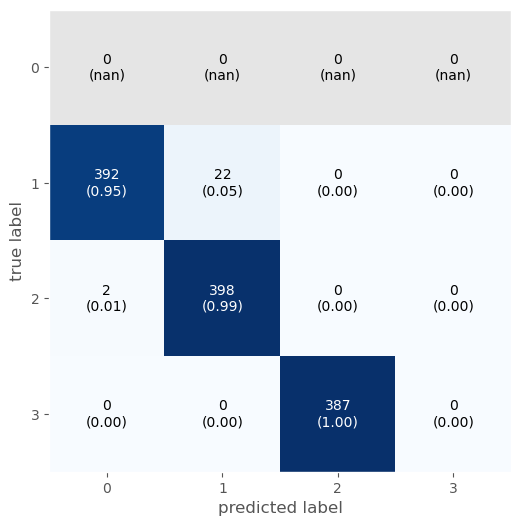

In [35]:
pred_rf = rf_classifier.predict(x_test)

evaluator(y_test, pred_rf)


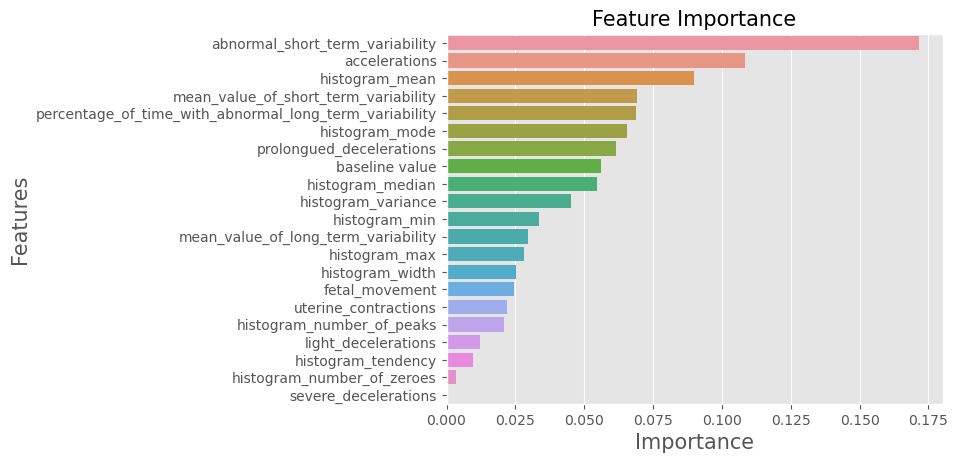

                                             Features  Importance
7                     abnormal_short_term_variability    0.171526
1                                       accelerations    0.108471
17                                     histogram_mean    0.089858
8                mean_value_of_short_term_variability    0.069065
9   percentage_of_time_with_abnormal_long_term_var...    0.068862
16                                     histogram_mode    0.065375
6                            prolongued_decelerations    0.061673
0                                      baseline value    0.056201
18                                   histogram_median    0.054600
19                                 histogram_variance    0.045185
12                                      histogram_min    0.033447
10                mean_value_of_long_term_variability    0.029692
13                                      histogram_max    0.028041
11                                    histogram_width    0.025153
2         

In [36]:
important_features = pd.DataFrame({'Features': x.columns, 
                                   'Importance': rf_classifier.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()
print(important_features)

In [31]:
input = np.array([[134.0,	0.003,	0.0,	0.008,	0.003,	0.0,	0.0,	16.0,	2.4,	0.0,	23.0,	117.0,	53.0,	170.0,	11.0,	0.0,	137.0,	134.0,	137.0,	13.0,	1.0]])
z=rf_classifier.predict(input)
print(z)

for i in range(len(z)):
  if z[i]== 1:
    print("Normal")
  elif z[i]==2:
    print("Suspect")
  else:
    print("Pathological")

[1]
Normal


In [32]:
input = np.array([[132.0,	0.006,	0.0,	0.006,	0.003,	0.0,	0.0,	17.0,	2.1,	0.0,	10.4,	130.0,	68.0,	198.0,	6.0,	1.0,	141.0,	136.0,	140.0,	12.0,	0.0]])
a=rf_classifier.predict(input)
print(a)

for i in range(len(a)):
  if a[i]== 1:
    print("Normal")
  elif a[i]==2:
    print("Suspect")
  else:
    print("Pathological")

[1]
Normal


In [33]:
input = np.array([[5.0,24.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]])
a=rf_classifier.predict(input)
print(a)

for i in range(len(a)):
  if a[i]== 1:
    print("Normal")
  elif a[i]==2:
    print("Suspect")
  else:
    print("Pathological")

[0]
Pathological
